In [118]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

df = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data' )
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [120]:
#Data Processing

missing_values=df.isnull().sum()
missing_values


ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [122]:
df.describe()


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [124]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
df = df.dropna()
df = df[(np.abs(zscore(df)) < 5).all(axis=1)]
print(df.shape)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
print(scaled_data[:5])


(3816, 12)
[[-1.7442346  -0.51616171 -0.18400166 -0.7691085   0.          0.
  -0.75032283 -1.12399254 -0.38980011 -0.41452292  1.40620876 -0.74499143]
 [-1.74337201 -0.63573876 -0.18400166 -0.7691085   0.          0.
  -0.74835763 -1.01220554 -0.38980011 -0.41452292  1.39069325 -0.74499143]
 [-1.74250943 -0.33864373 -0.18400166 -0.7691085   0.          0.
  -0.56104075 -0.78863153 -0.38980011 -0.41452292  1.42269398 -0.74499143]
 [-1.74164685 -0.69577587 -0.18400166 -0.7691085   0.          0.
  -0.73469711 -1.12399254 -0.38980011 -0.41452292  1.3829355  -0.74499143]
 [-1.74078426  0.41918373 -0.18400166  1.43649122  0.          0.
   1.31677748  1.67068255  1.99381746  1.19793321  1.37469288  1.34229733]]


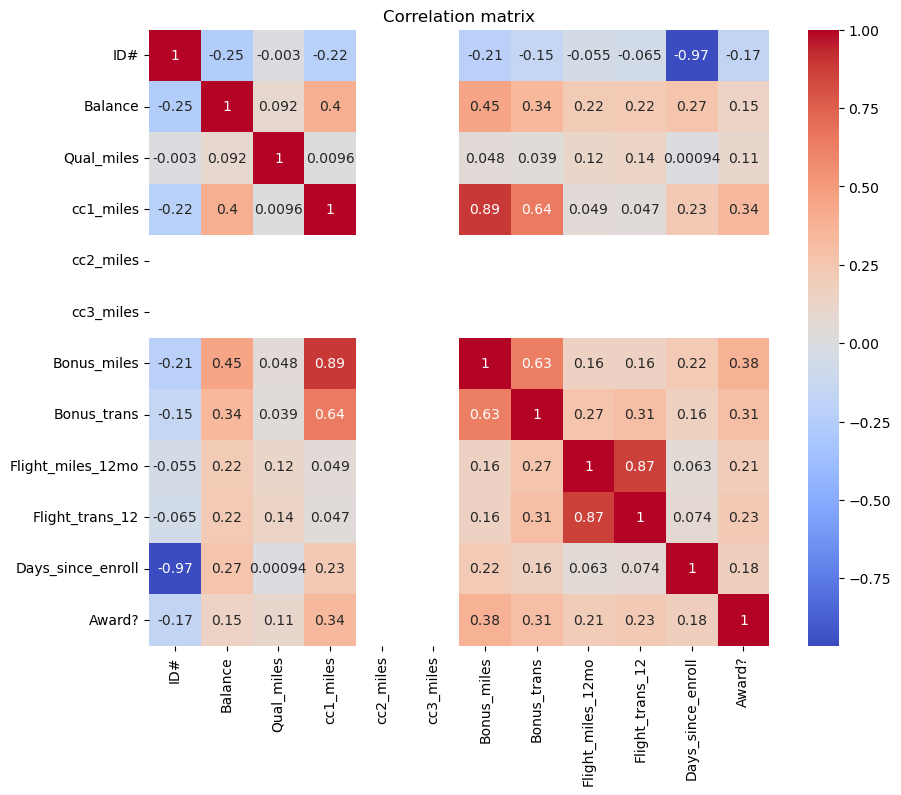

In [126]:
#Exploratory Data Analysis and Visualizations
#HEATMAP

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

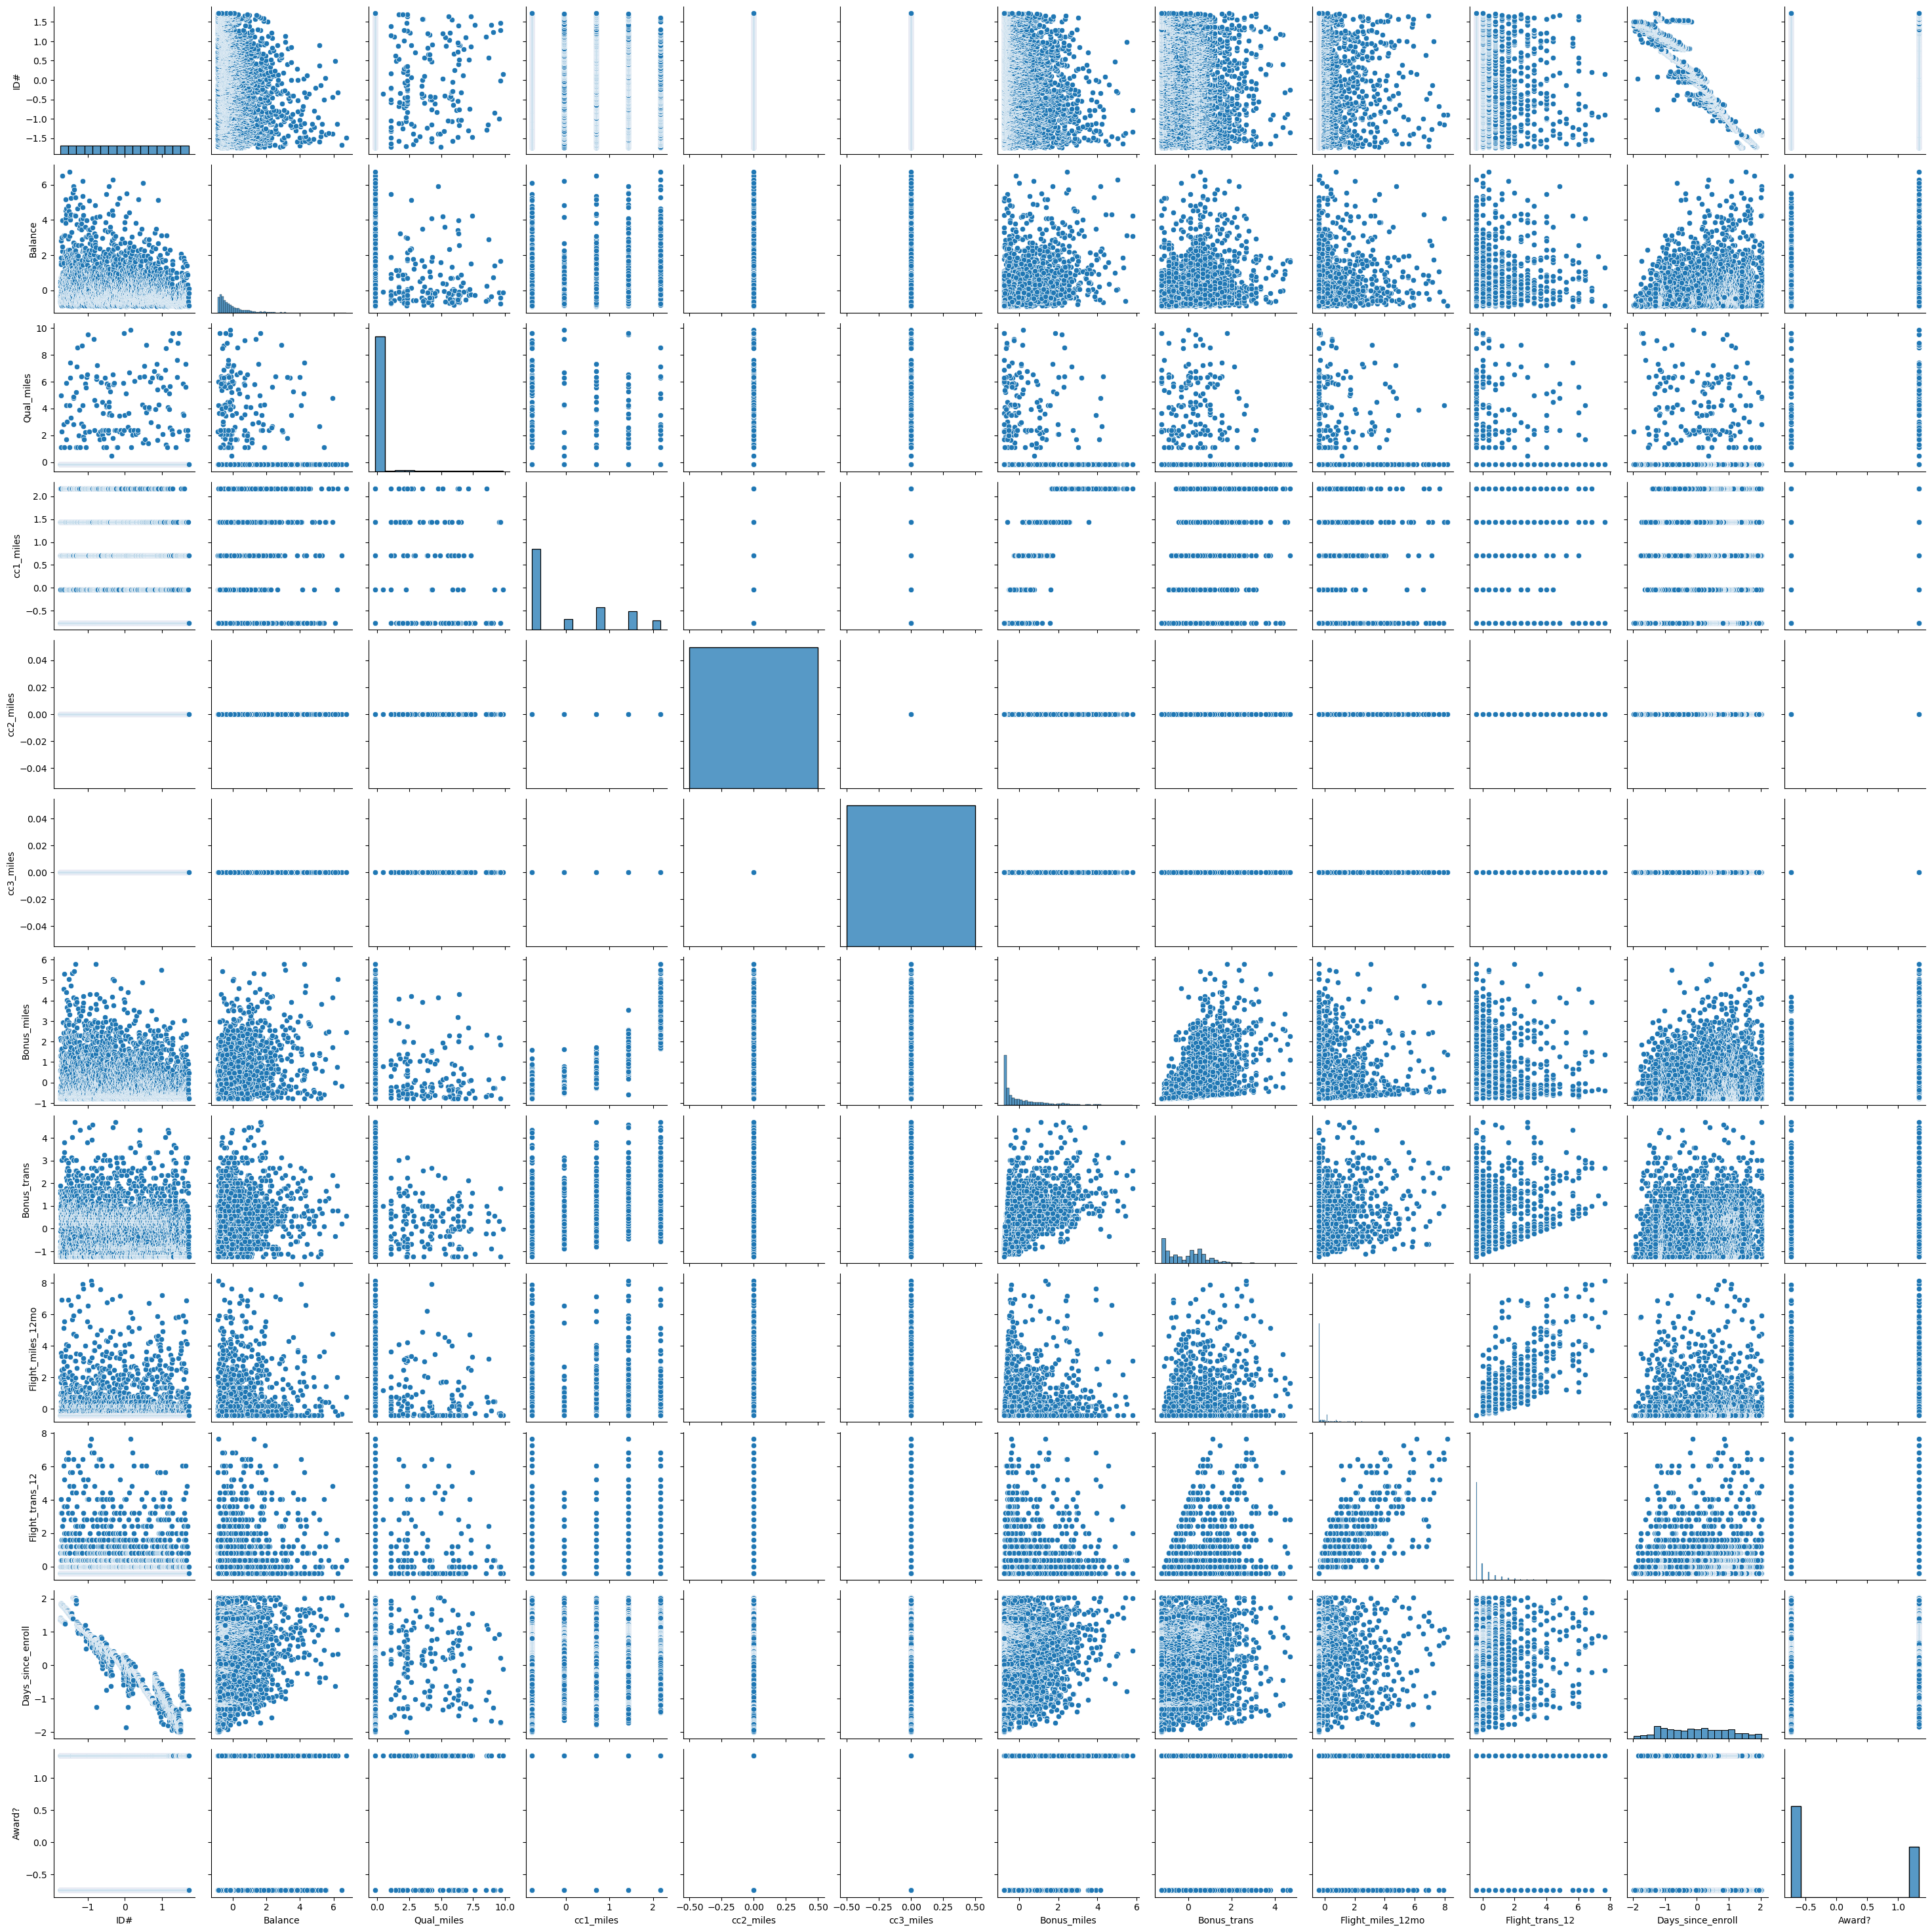

In [128]:
#PAIRPLOT
sns.pairplot(pd.DataFrame(scaled_data,columns=df.columns))
plt.show()

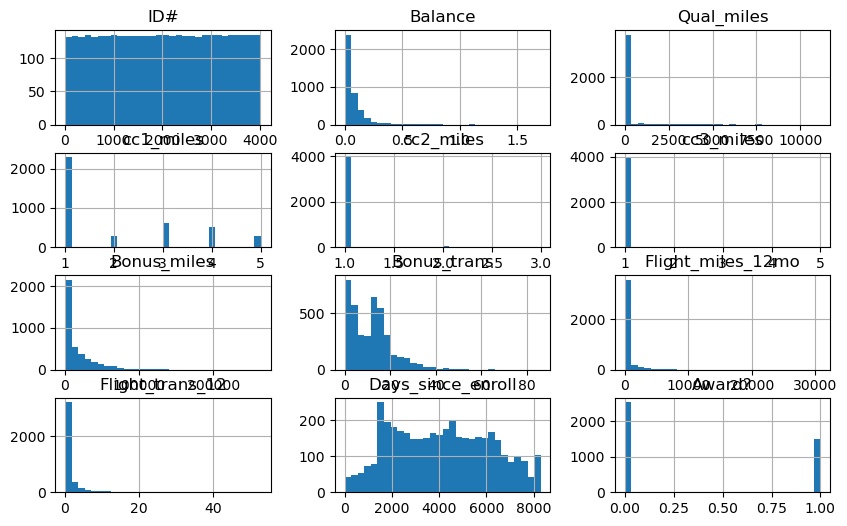

In [44]:
#HISTOGRAM
df.hist(figsize=(10,6), bins=30)
plt.show()
         

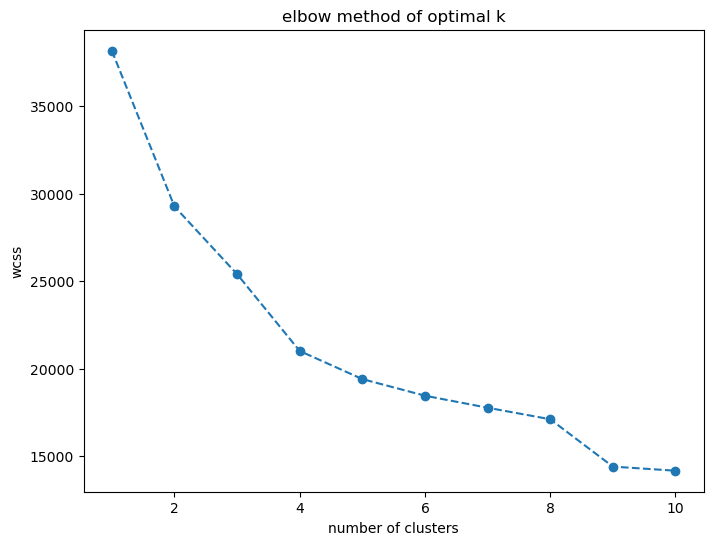

In [98]:
#Implementing Clustering algorithms
# Elbow Method to determine the optimal number of clusters for K-Means.
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(range(1,11), wcss, marker ='o', linestyle='--')
plt.title('elbow method of optimal k')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

        


In [130]:
#Apply K-Means Clustering
# Applying K-Means with optimal K
from sklearn.metrics import silhouette_score

optimal_k = 3  # Adjust based on your Elbow curve
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans_clusters = kmeans.fit_predict(scaled_data)

# Silhouette Score for K-Means
silhouette_kmeans = silhouette_score(scaled_data, kmeans_clusters)
print(f"Silhouette Score for K-Means: {silhouette_kmeans}")


Silhouette Score for K-Means: 0.21101076270203625


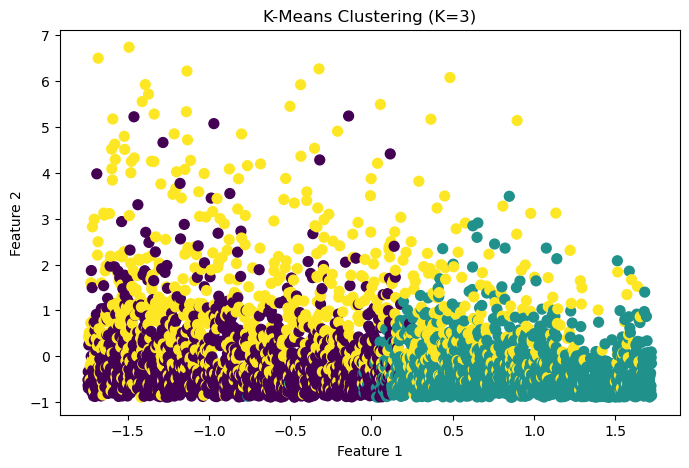

In [132]:
plt.figure(figsize=(8,5))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans_clusters, cmap='viridis', s=50)
plt.title(f'K-Means Clustering (K={optimal_k})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


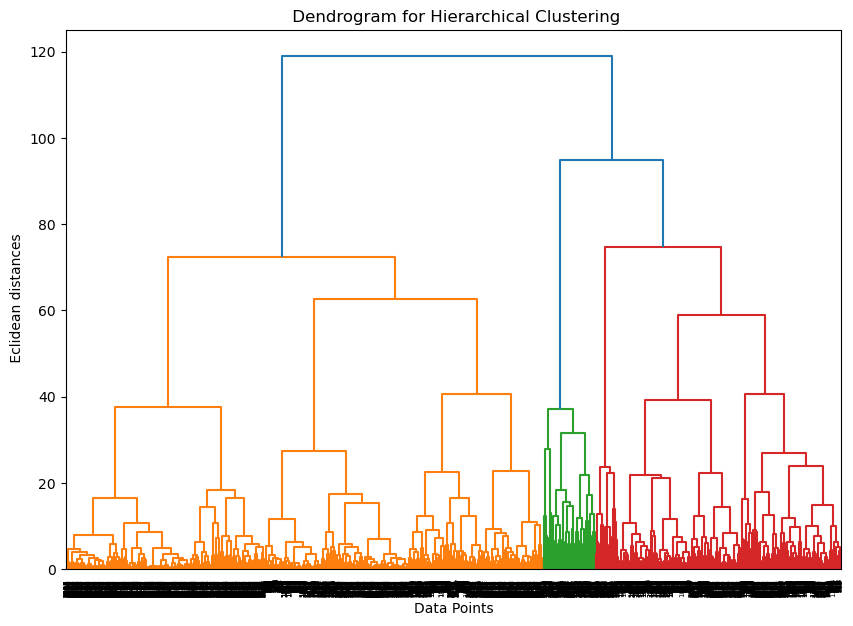

In [80]:
#Hierarchical Clustering
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(scaled_data, method='ward')
plt.figure(figsize=(10,7))
dendrogram(linked)
plt.title(' Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel(' Eclidean distances')
plt.show()


In [104]:
# Applying Agglomerative Clustering
hierarchical = AgglomerativeClustering(n_clusters=optimal_k, metric='euclidean', linkage='ward')
hierarchical_clusters = hierarchical.fit_predict(scaled_data)

# Silhouette Score for Hierarchical Clustering
silhouette_hierarchical = silhouette_score(scaled_data, hierarchical_clusters)
print(f"Silhouette Score for Hierarchical Clustering: {silhouette_hierarchical}")


Silhouette Score for Hierarchical Clustering: 0.2550088051099147


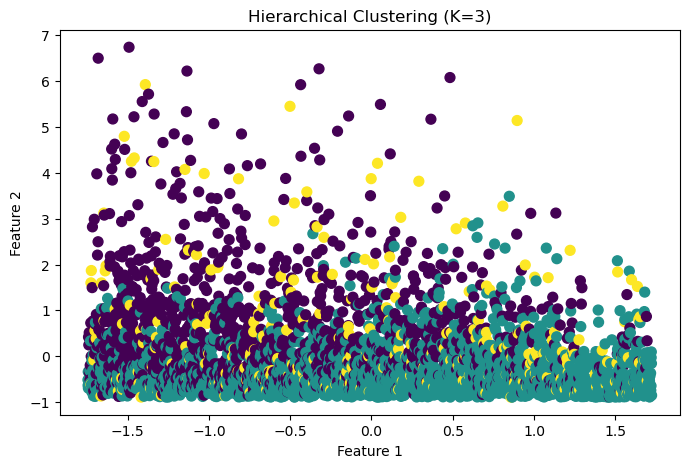

In [106]:
plt.figure(figsize=(8,5))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=hierarchical_clusters, cmap='viridis', s=50)
plt.title(f'Hierarchical Clustering (K={optimal_k})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [158]:
#DBScan Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(scaled_data)

if len(set(dbscan_clusters)) > 1:
    silhouette_dbscan = silhouette_score(scaled_data, dbscan_clusters)
    print(f"Silhouette Score for DBSCAN: {silhouette_dbscan}")
else:
    print("DBSCAN failed to find multiple clusters.")
    
    

Silhouette Score for DBSCAN: -0.3559672744229063


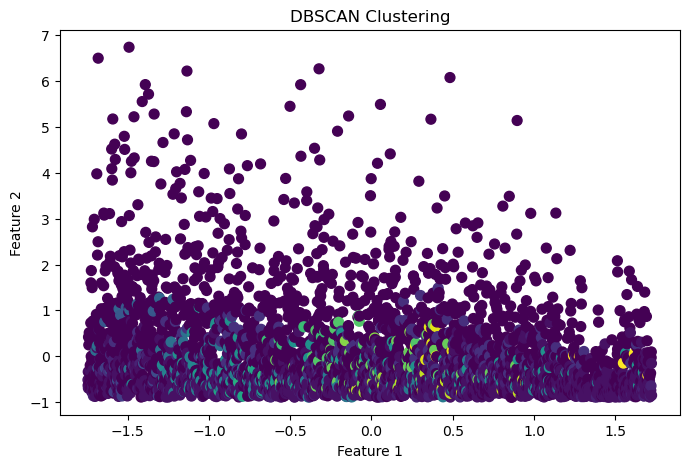

In [114]:
plt.figure(figsize=(8,5))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=dbscan_clusters, cmap='viridis', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()



In [116]:
print(f"Silhouette Score for K-Means: {silhouette_kmeans}")
print(f"Silhouette Score for Hierarchical Clustering: {silhouette_hierarchical}")

if len(set(dbscan_clusters)) > 1:
    print(f"Silhouette Score for DBSCAN: {silhouette_dbscan}")
else:
    print("DBSCAN could not form clusters.")


Silhouette Score for K-Means: 0.21101076270203625
Silhouette Score for Hierarchical Clustering: 0.2550088051099147
Silhouette Score for DBSCAN: -0.3559672744229063
